### ETL on bioactivity data from chembl 

In [1]:
# ! pip install chembl-webresource-client

In [2]:
from chembl_webresource_client.settings import Settings
from chembl_webresource_client.new_client import new_client

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
activities = new_client.activity
target = 'CHEMBL3553'

target_activities = activities.filter(target_chembl_id=target, pchembl_value__isnull=False)
print(f"{len(target_activities)} molecules for {target}")

1905 molecules for CHEMBL3553


In [4]:
target_activities_df = pd.DataFrame.from_dict(target_activities)
target_activities_df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,506158,[],CHEMBL819922,Inhibition of Tyrosine kinase 2 kinase,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,0.001
1,None,1765466,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,2.73
2,None,1765494,[],CHEMBL871539,Inhibition of Tyk2 by HTRF kinase assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,1.83
3,None,2112048,[],CHEMBL934199,Inhibition of Tyk2 by HTRF assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,uM,UO_0000065,None,1.2
4,None,2137279,[],CHEMBL937052,Inhibition of Tyk2,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosine-protein kinase TYK2,9606,None,None,IC50,nM,UO_0000065,None,1.0


In [5]:
target_activities_df_reduced = target_activities_df[['molecule_chembl_id', 'molecule_pref_name', 'canonical_smiles', 
                                                 'pchembl_value', 'standard_type', 'standard_relation', 'standard_value',
                                                 'standard_units', 'potential_duplicate', 
                                                 'target_pref_name', 'target_organism',
                                                 'assay_type', 'assay_description']]

target_activities_df_reduced.head(10)

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description
0,CHEMBL21156,None,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,9.00,IC50,=,1.0,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyrosine kinase 2 kinase
1,CHEMBL386661,None,CNc1ncc2cc(-c3cc(C(=O)Nc4cc(C(F)(F)F)ccc4OC4CC...,5.56,IC50,=,2730.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyk2 by HTRF kinase assay
2,CHEMBL215943,None,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,5.74,IC50,=,1830.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyk2 by HTRF kinase assay
3,CHEMBL410295,None,Cc1cccc(C)c1-n1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)c...,5.92,IC50,=,1200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyk2 by HTRF assay
4,CHEMBL21156,None,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,9.00,IC50,=,1.0,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyk2
5,CHEMBL509032,TAE-684,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,5.64,IC50,=,2309.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tel-fused TYK2 kinase-mediated m...
6,CHEMBL495727,AT-9283,O=C(Nc1c[nH]nc1-c1nc2ccc(CN3CCOCC3)cc2[nH]1)NC...,9.00,IC50,=,1.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of Tyk2
7,CHEMBL21156,None,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,9.00,IC50,=,1.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2
8,CHEMBL514409,HESPERADIN,CCS(=O)(=O)Nc1ccc2c(c1)/C(=C(/Nc1ccc(CN3CCCCC3...,7.12,Kd,=,75.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding affinity to human TYK2
9,CHEMBL221959,TOFACITINIB,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding affinity to TYK2


In [6]:
target_activities_df_reduced.shape

(1905, 13)

In [7]:
target_activities_df_reduced[target_activities_df_reduced['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description
1393,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human Jurkat cells asses...
1429,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,IC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...
1457,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.70,IC50,=,2.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...
1458,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.05,IC50,=,9.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...
1462,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,9.70,IC50,=,0.2,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Allosteric inhibition of fluorescein labeled p...
1463,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...
1599,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding affinity to TYK2 pseudokinase domain (...
1600,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,EC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...
1778,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,9.70,IC50,=,0.2,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 JH2 domain (unknown origin)...
1799,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.28,IC50,=,5.3,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in IFN-alpha stimulated hum...


In [8]:
target_activ_df_sorted = target_activities_df_reduced.sort_values(by=['molecule_chembl_id','pchembl_value'], 
                                                              ascending=True)
target_activ_df_sorted

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description
118,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...
30,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
1110,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-..."
27,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
19,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,CHEMBL608154,None,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,6.30,Kd,=,500.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...
13,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(Kin.Dom.2/JH1 - cata...
50,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding affinity to TYK2(JH1domain-catalytic)
95,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...


In [9]:
target_activ_df_sorted[target_activ_df_sorted['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description
1393,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human Jurkat cells asses...
1463,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...
1599,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding affinity to TYK2 pseudokinase domain (...
1827,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.75,IC50,=,18.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...
1429,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,IC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...
1600,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,EC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...
1458,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.05,IC50,=,9.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...
1799,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.28,IC50,=,5.3,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in IFN-alpha stimulated hum...
1457,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.70,IC50,=,2.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...
1462,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,9.70,IC50,=,0.2,nM,1,Tyrosine-protein kinase TYK2,Homo sapiens,B,Allosteric inhibition of fluorescein labeled p...


In [10]:
#remove potential duplicated activity entries
target_activ_df_sorted.drop(target_activ_df_sorted[target_activ_df_sorted['potential_duplicate'] == True].index, inplace = True)
target_activ_df_sorted.shape

(1867, 13)

In [11]:
target_activ_df_sorted

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description
118,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...
30,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
1110,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-..."
27,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
19,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,CHEMBL603469,LESTAURTINIB,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,6.04,Kd,=,910.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...
115,CHEMBL603469,LESTAURTINIB,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,7.82,Kd,=,15.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...
117,CHEMBL608154,None,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,6.30,Kd,=,500.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...
95,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...


In [12]:
#Remove duplicates of remaining molecules after aggregating the pChembl values

#duplicates_df = target_activ_df_sorted.duplicated('molecule_chembl_id')
#duplicates_df
target_activ_df_sorted['chembl_id_duplicate'] = target_activ_df_sorted.duplicated('molecule_chembl_id')
target_activ_df_sorted[['molecule_chembl_id','chembl_id_duplicate']]

,molecule_chembl_id,chembl_id_duplicate
118,CHEMBL10,False
30,CHEMBL1076700,False
1110,CHEMBL1078178,False
27,CHEMBL1080159,False
19,CHEMBL1081290,False
...,...,...
116,CHEMBL603469,False
115,CHEMBL603469,True
117,CHEMBL608154,False
95,CHEMBL608533,False


In [13]:
target_activ_df_sorted[target_activ_df_sorted['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate
1463,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...,False
1827,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.75,IC50,=,18.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...,True
1429,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,IC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...,True
1600,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,7.89,EC50,=,13.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human whole blood assess...,True
1458,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.05,IC50,=,9.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...,True
1799,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.28,IC50,=,5.3,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in IFN-alpha stimulated hum...,True
1457,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,8.70,IC50,=,2.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 in human PBMC assessed as d...,True
1778,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,9.70,IC50,=,0.2,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of TYK2 JH2 domain (unknown origin)...,True


In [14]:
duplicates = set(target_activ_df_sorted[target_activ_df_sorted['chembl_id_duplicate'] == True]['molecule_chembl_id'])
duplicates

{'CHEMBL1241674',
 'CHEMBL1287853',
 'CHEMBL1421',
 'CHEMBL1650951',
 'CHEMBL1721885',
 'CHEMBL1789941',
 'CHEMBL1908395',
 'CHEMBL1908397',
 'CHEMBL1983111',
 'CHEMBL2035187',
 'CHEMBL2105759',
 'CHEMBL21156',
 'CHEMBL221959',
 'CHEMBL2385096',
 'CHEMBL2386629',
 'CHEMBL2386633',
 'CHEMBL2386635',
 'CHEMBL2386636',
 'CHEMBL2387110',
 'CHEMBL2387112',
 'CHEMBL2387118',
 'CHEMBL2387119',
 'CHEMBL2387124',
 'CHEMBL2387126',
 'CHEMBL2387127',
 'CHEMBL2387221',
 'CHEMBL2387222',
 'CHEMBL2387223',
 'CHEMBL2387224',
 'CHEMBL2387225',
 'CHEMBL288441',
 'CHEMBL3301607',
 'CHEMBL3622821',
 'CHEMBL3655081',
 'CHEMBL3763184',
 'CHEMBL3763213',
 'CHEMBL3763252',
 'CHEMBL3763697',
 'CHEMBL3763991',
 'CHEMBL3764030',
 'CHEMBL3764167',
 'CHEMBL3764277',
 'CHEMBL3764383',
 'CHEMBL3764637',
 'CHEMBL3765517',
 'CHEMBL3765822',
 'CHEMBL388978',
 'CHEMBL3906967',
 'CHEMBL4062680',
 'CHEMBL4062758',
 'CHEMBL4068357',
 'CHEMBL4069942',
 'CHEMBL4070262',
 'CHEMBL4071399',
 'CHEMBL4075453',
 'CHEMBL4076947',


In [15]:
#calculate mean, max, min pchembl value of duplicates

agg_activ_dp = [(m, 
  np.round(target_activ_df_sorted[target_activ_df_sorted['molecule_chembl_id'] == m]['pchembl_value'].astype(float).mean(), 2),
  np.round(target_activ_df_sorted[target_activ_df_sorted['molecule_chembl_id'] == m]['pchembl_value'].astype(float).max(), 2),
  np.round(target_activ_df_sorted[target_activ_df_sorted['molecule_chembl_id'] == m]['pchembl_value'].astype(float).min(), 2)) 
                for m in duplicates]

agg_activ_dp_df = pd.DataFrame(agg_activ_dp, 
                               columns=['molecule_chembl_id', 'mean_pchembl_value', 'max_pchembl_value', 'min_pchembl_value'])

agg_activ_dp_df

,molecule_chembl_id,mean_pchembl_value,max_pchembl_value,min_pchembl_value
0,CHEMBL572878,6.06,6.70,5.18
1,CHEMBL4474801,7.71,9.85,6.42
2,CHEMBL4062758,8.09,9.40,6.77
3,CHEMBL535,6.12,6.44,5.80
4,CHEMBL4069942,8.04,9.22,6.85
...,...,...,...,...
171,CHEMBL221959,7.30,8.44,5.92
172,CHEMBL4281304,6.35,7.18,5.92
173,CHEMBL475251,7.26,7.80,6.72
174,CHEMBL4784391,7.67,8.72,6.79


In [16]:
#remove duplicates and keep first match

new_activ_df = target_activ_df_sorted.drop_duplicates('molecule_chembl_id', keep='first')
new_activ_df = new_activ_df.reset_index(drop=True)
new_activ_df

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate
0,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False
1,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False
2,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-...",False
3,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False
4,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,CHEMBL601719,CRIZOTINIB,C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False
1545,CHEMBL603469,LESTAURTINIB,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,6.04,Kd,=,910.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False
1546,CHEMBL608154,None,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,6.30,Kd,=,500.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False
1547,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...,False


In [17]:
new_activ_df.shape

(1549, 14)

In [18]:
#make a copy of the dataframe just in case
import copy
new_activ_df_dc = copy.deepcopy(new_activ_df)

In [19]:
#merge the nonduplicated dataframe with aggregated values of duplicates dataframe
merged_activ_df = new_activ_df.merge(agg_activ_dp_df, how='left', on='molecule_chembl_id')
merged_activ_df

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value
0,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,NaN,NaN,NaN
1,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,NaN,NaN,NaN
2,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-...",False,NaN,NaN,NaN
3,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,NaN,NaN,NaN
4,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,CHEMBL601719,CRIZOTINIB,C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,6.09,6.68,5.70
1545,CHEMBL603469,LESTAURTINIB,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,6.04,Kd,=,910.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,6.93,7.82,6.04
1546,CHEMBL608154,None,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,6.30,Kd,=,500.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,NaN,NaN,NaN
1547,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...,False,NaN,NaN,NaN


In [20]:
#verify merge
merged_activ_df[merged_activ_df['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value
1172,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...,False,8.62,10.7,7.75


In [21]:
merged_activ_df_dc = copy.deepcopy(merged_activ_df)

In [22]:
#fill NaNs in the aggregated columns with original pchembl values for the original non-duplicated chembl ids

idxs = merged_activ_df[pd.isna(merged_activ_df['mean_pchembl_value'])].index
fill_NaN = merged_activ_df['pchembl_value'].iloc[idxs]
merged_activ_df['mean_pchembl_value'].iloc[idxs] = fill_NaN
merged_activ_df['max_pchembl_value'].iloc[idxs] = fill_NaN
merged_activ_df['min_pchembl_value'].iloc[idxs] = fill_NaN
merged_activ_df

/tmp/ipykernel_10434/1201719711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_activ_df['mean_pchembl_value'].iloc[idxs] = fill_NaN
/tmp/ipykernel_10434/1201719711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_activ_df['max_pchembl_value'].iloc[idxs] = fill_NaN
/tmp/ipykernel_10434/1201719711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_activ_df['min_pchembl_value'].iloc[idxs] = fill_NaN


,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value
0,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,5.70,5.70,5.70
1,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,7.01,7.01,7.01
2,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-...",False,6.40,6.40,6.40
3,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,6.70,6.70,6.70
4,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,5.47,5.47,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,CHEMBL601719,CRIZOTINIB,C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,6.09,6.68,5.7
1545,CHEMBL603469,LESTAURTINIB,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,6.04,Kd,=,910.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,6.93,7.82,6.04
1546,CHEMBL608154,None,COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C,6.30,Kd,=,500.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,6.30,6.30,6.30
1547,CHEMBL608533,MIDOSTAURIN,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,6.60,Kd,=,250.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH1domain-catalytic)...,False,6.60,6.60,6.60


In [23]:
idxs = merged_activ_df[pd.isna(merged_activ_df['mean_pchembl_value'])].index 
idxs

Int64Index([], dtype='int64')

In [24]:
#verify correct fill 
merged_activ_df[merged_activ_df['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value
1172,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...,False,8.62,10.7,7.75


<AxesSubplot: xlabel='mean_pchembl_value', ylabel='Count'>

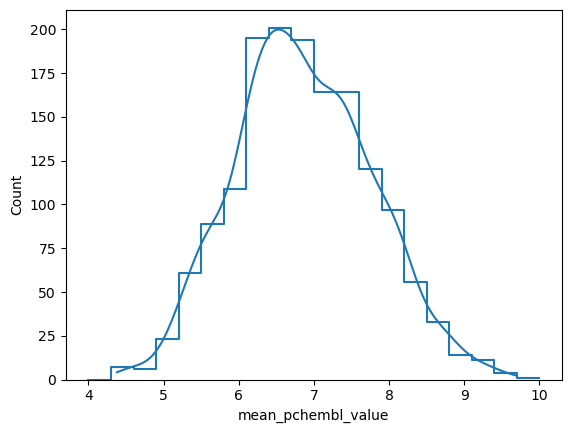

In [25]:
sns.histplot(data=merged_activ_df, x=merged_activ_df['mean_pchembl_value'].astype(float), 
             binrange=[4,10], bins=20, element='step', fill=False, kde=True)

<AxesSubplot: xlabel='max_pchembl_value', ylabel='Count'>

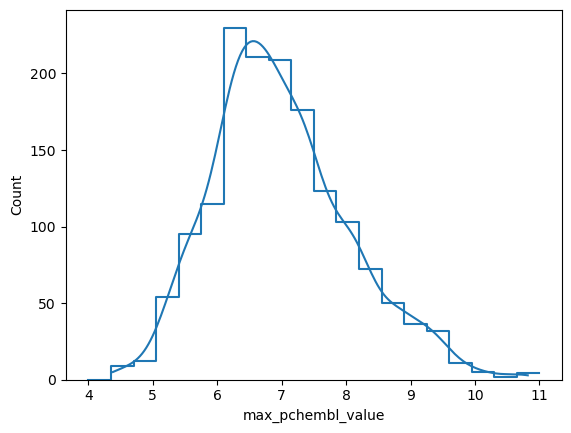

In [26]:
sns.histplot(data=merged_activ_df, x=merged_activ_df['max_pchembl_value'].astype(float), 
             binrange=[4,11], bins=20, element='step', fill=False, kde=True)

<AxesSubplot: xlabel='min_pchembl_value', ylabel='Count'>

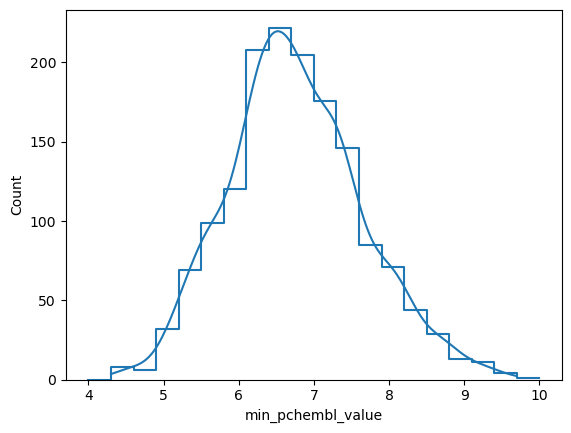

In [27]:
sns.histplot(data=merged_activ_df, x=merged_activ_df['min_pchembl_value'].astype(float), 
             binrange=[4,10], bins=20, element='step', fill=False, kde=True)

In [28]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

mol_list = [Chem.MolFromSmiles(m) for m in merged_activ_df['canonical_smiles']]
scaffolds = []
for m in mol_list:
    try:
        core = MurckoScaffold.GetScaffoldForMol(m)
    except:
        continue
    scaffolds.append(core)
    
core_smiles = [Chem.MolToSmiles(core) for core in scaffolds]
merged_activ_df['core_smiles'] = core_smiles
merged_activ_df.head()


,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value,core_smiles
0,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,5.70,5.70,5.70,c1ccc(-c2nc(-c3ccccc3)c(-c3ccncc3)[nH]2)cc1
1,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,7.01,7.01,7.01,c1ccc(Nc2nc3cccc(-c4ccc(CN5CCOCC5)cc4)c3o2)cc1
2,CHEMBL1078178,MOMELOTINIB,N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2...,6.40,Kd,=,401.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,"Kinobeads (epsilon), multiple immobilized ATP-...",False,6.40,6.40,6.40,c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)cc1
3,CHEMBL1080159,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,6.70,IC50,=,200.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,6.70,6.70,6.70,c1ccc(Nc2nc3cccc(-c4ccc(CN5CCOCC5)cc4)c3o2)cc1
4,CHEMBL1081290,None,COc1cc(Nc2nc3cccc(-c4ccccc4)c3o2)cc(OC)c1OC,5.47,IC50,=,3400.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,5.47,5.47,5.47,c1ccc(Nc2nc3cccc(-c4ccccc4)c3o2)cc1


In [29]:
merged_activ_df[merged_activ_df['molecule_chembl_id'] == 'CHEMBL4435170']

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value,core_smiles
1172,CHEMBL4435170,DEUCRAVACITINIB,[2H]C([2H])([2H])NC(=O)c1nnc(NC(=O)C2CC2)cc1Nc...,10.70,Ki,=,0.02,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of fluorescein labeled probe bindin...,False,8.62,10.7,7.75,O=C(Nc1cc(Nc2cccc(-c3nc[nH]n3)c2)cnn1)C1CC1


In [30]:
merged_activ_df.iloc[1167]['core_smiles']

'O=c1c2ccccc2c2cnc3[nH]ccc3c2n1C1CCCCC1'

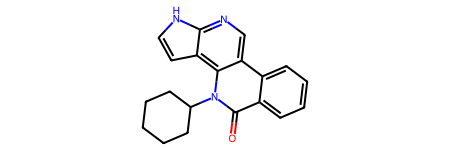

In [32]:
Chem.MolFromSmiles(merged_activ_df.iloc[1167]['core_smiles'])

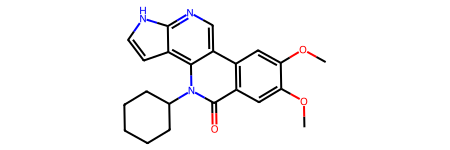

In [33]:
Chem.MolFromSmiles(merged_activ_df.iloc[1167]['canonical_smiles'])

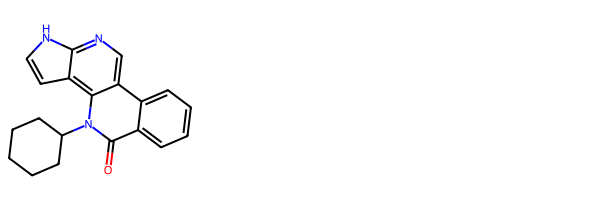

In [34]:
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools

deucravacitinib_core = Chem.MolFromSmarts('O=C(Nc1cc(Nc2cccc(-c3nc[nH]n3)c2)cnn1)C1CC1')
deucravacitinib_core
#match_list = [m.GetSubstructMatch(deucravacitinib_core) for m in mol_list]
#match_list[1167]

#MolsToGridImage(mol_list, highlightAtomLists=match_list, molsPerRow=4, maxMols=8)
deu = Chem.MolFromSmiles(merged_activ_df.iloc[1167]['core_smiles'])
match = [deu.GetSubstructMatch(deucravacitinib_core)]
MolsToGridImage([deu], highlightAtomLists=match)

In [35]:
#need to remove the H from smarts to work
core = Chem.MolFromSmarts('O=C(Nc1cc(Nc2cccc(-c3nc[nH]n3)c2)cnn1)C1CC1')
core
match_list = [m.GetSubstructMatch(core) for m in mol_list]

#[m for m in match_list if len(m) >0]
res = list(filter(lambda i: len(i) !=0, match_list))
res

[]

In [36]:
for atom in core.GetAtoms():
    if atom.GetIsAromatic() and atom.GetAtomicNum()!=6 and atom.GetNumExplicitHs():
        atom.SetNoImplicit(True)
        atom.SetNumExplicitHs(0)
print(Chem.MolToSmarts(core))

match_list = [m.GetSubstructMatch(core) for m in mol_list]

#[m for m in match_list if len(m) >0]
match_list_filtered = list(filter(lambda i: len(i) !=0, match_list))
match_list_filtered

O=C(Nc1cc(Nc2cccc(-c3nc[n&H1]n3)c2)cnn1)C1CC1


[]

In [37]:
PandasTools.AddMoleculeColumnToFrame(merged_activ_df, 'canonical_smiles', 'Mol')

In [38]:
PandasTools.AddMoleculeColumnToFrame(merged_activ_df, 'core_smiles', 'Scaffold')

In [39]:
merged_activ_df[['Mol', 'Scaffold']].head()

,Mol,Scaffold
0,<rdkit.Chem.rdchem.Mol object at 0x7fc1766b5900>,<rdkit.Chem.rdchem.Mol object at 0x7fc17657aac0>
1,<rdkit.Chem.rdchem.Mol object at 0x7fc1766b5200>,<rdkit.Chem.rdchem.Mol object at 0x7fc17657a9e0>
2,<rdkit.Chem.rdchem.Mol object at 0x7fc1766b5a50>,<rdkit.Chem.rdchem.Mol object at 0x7fc17657ab30>
3,<rdkit.Chem.rdchem.Mol object at 0x7fc1766b5ac0>,<rdkit.Chem.rdchem.Mol object at 0x7fc17657aba0>
4,<rdkit.Chem.rdchem.Mol object at 0x7fc1766b5b30>,<rdkit.Chem.rdchem.Mol object at 0x7fc17657ac10>


In [ ]:
merged_activ_df

In [40]:
merged_activ_df.to_pickle('../data/chembl_bioactivity_data.pkl')

In [41]:
chembl_bioactivity_df = pd.read_pickle('../data/chembl_bioactivity_data.pkl')
chembl_bioactivity_df.head(2)

,molecule_chembl_id,molecule_pref_name,canonical_smiles,pchembl_value,standard_type,standard_relation,standard_value,standard_units,potential_duplicate,target_pref_name,target_organism,assay_type,assay_description,chembl_id_duplicate,mean_pchembl_value,max_pchembl_value,min_pchembl_value,core_smiles,Mol,Scaffold
0,CHEMBL10,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,5.70,Kd,=,2000.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Binding constant for TYK2(JH2domain-pseudokina...,False,5.70,5.70,5.70,c1ccc(-c2nc(-c3ccccc3)c(-c3ccncc3)[nH]2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fc17671df90>,<rdkit.Chem.rdchem.Mol object at 0x7fc17637fb30>
1,CHEMBL1076700,None,Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3...,7.01,IC50,=,97.0,nM,0,Tyrosine-protein kinase TYK2,Homo sapiens,B,Inhibition of GST-tagged TYK2 assessed as inhi...,False,7.01,7.01,7.01,c1ccc(Nc2nc3cccc(-c4ccc(CN5CCOCC5)cc4)c3o2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fc1761c2cc0>,<rdkit.Chem.rdchem.Mol object at 0x7fc17637fb80>


In [ ]:
merged_activ_df.to_csv('../data/chembl_bioactivity_data.csv')

In [45]:
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)

merged_activ_df_dc.to_sql('chembl_bioactivity_data', con=engine)

1549

In [46]:
engine.execute("SELECT * FROM chembl_bioactivity_data").fetchall()

[(0, 'CHEMBL10', 'SB-203580', 'C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1', '5.70', 'Kd', '=', '2000.0', 'nM', 0, 'Tyrosine-protein kinase TYK2', 'Homo sapiens', 'B', 'Binding constant for TYK2(JH2domain-pseudokinase) kinase domain', 0, None, None, None),
 (1, 'CHEMBL1076700', None, 'Cc1cc(Nc2nc3cccc(-c4cc(F)c(CN5CCOCC5)c(F)c4)c3o2)ccc1C(=O)NCCCN(C)C', '7.01', 'IC50', '=', '97.0', 'nM', 0, 'Tyrosine-protein kinase TYK2', 'Homo sapiens', 'B', 'Inhibition of GST-tagged TYK2 assessed as inhibition of biotinylated IRS1 substrate phosphorylation after 60 mins by caliper mobility shift assay', 0, None, None, None),
 (2, 'CHEMBL1078178', 'MOMELOTINIB', 'N#CCNC(=O)c1ccc(-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)cc1', '6.40', 'Kd', '=', '401.0', 'nM', 0, 'Tyrosine-protein kinase TYK2', 'Homo sapiens', 'B', 'Kinobeads (epsilon), multiple immobilized ATP-competitive broad spectrum kinase inhibitors, used to assess residual binding of ~300 proteins simultaneously from cell lysate in the presen